In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# check data types
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.shape

(14999, 10)

# 

## How does the average satisfaction level change with increasing years of employemen?

* we can be answered via 
  * Line Plot:
  * Scatter Plot:


In [11]:
# Calculate average satisfaction level for each years of employement
avg_satisfaction_year=df.groupby(['time_spend_company']).satisfaction_level.mean()
avg_satisfaction_year

time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

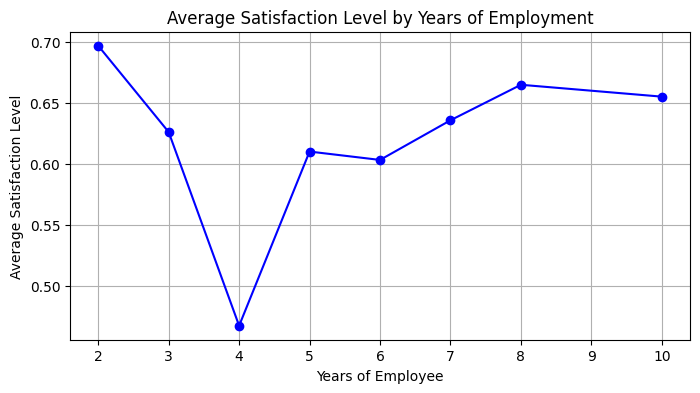

In [32]:
plt.figure(figsize=(8,4))
x_data = avg_satisfaction_year.index
y_data = avg_satisfaction_year.values
plt.plot(x_data,y_data, marker='o',color='b')
plt.xlabel('Years of Employee')
plt.ylabel('Average Satisfaction Level')
plt.title("Average Satisfaction Level by Years of Employment")
plt.grid(True) # it display the graph
plt.show()

* Decrease Trend: At start satisfaction_level is high and it decreases upto 4 years 
* Increase Trend: After 4 years the satisfaction_level starts increasing.


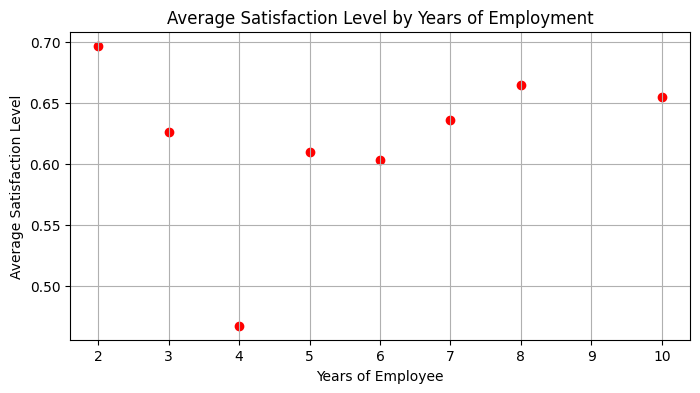

In [34]:
plt.figure(figsize=(8,4))
plt.scatter(x_data,y_data, marker='o',color='red')
plt.xlabel('Years of Employee')
plt.ylabel('Average Satisfaction Level')
plt.title("Average Satisfaction Level by Years of Employment")
plt.grid(True) # it display the graph
plt.show()

* This shows scatter plot is quits similar to line plot except dots are not connected by line.

# How many employee have spent a specific number of years (time spent in the company)?

* we can be answer via: 

  * Bar Plot

In [37]:
emp_years_count = df['time_spend_company'].value_counts()
emp_years_count

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

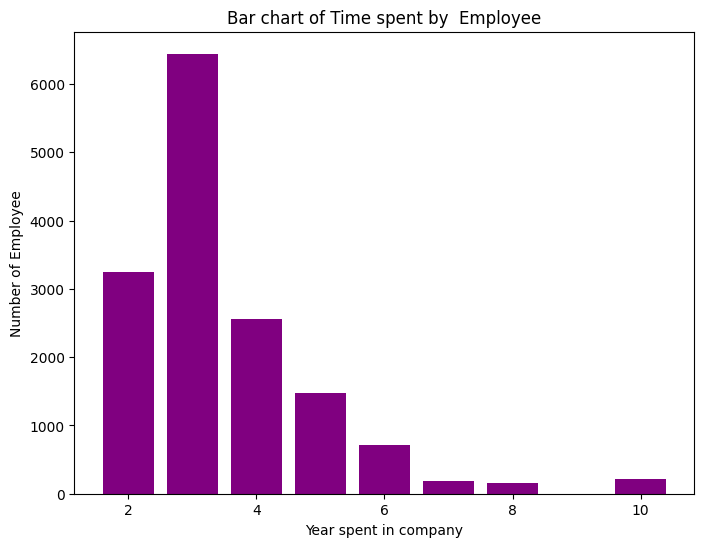

In [43]:
plt.figure(figsize=(8,6))
plt.bar(emp_years_count.index,emp_years_count.values,color='purple')
plt.xlabel('Year spent in company')
plt.ylabel('Number of Employee')
plt.title('Bar chart of Time spent by  Employee')
plt.show()

* Most employee spent 3 years in company
* After 3 years time spend in company is decreasing upto 9 years.
* But there are some number of people who are staying even for 10 years.

# What is the distribution of satisfaction levels among employees?

* We can be answer via: 
   
   *  histogram Plot
   
   

Text(0.5, 1.0, 'Distribution of Satisfaction Levels')

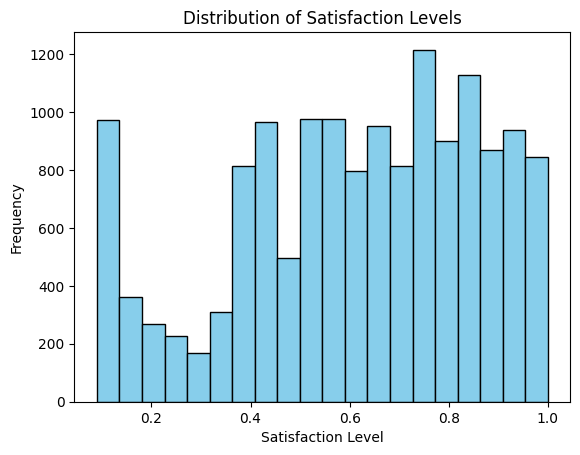

In [51]:
plt.hist(df['satisfaction_level'],bins=20,color='skyblue',edgecolor='black')# edgecolor set the edge of the bar
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Levels')


* This shows that distribution of satisfaction_level column is not Normal Distribution.
* We can say. Satisfaction_level is slightly left skewed.

# What is the distibution of work accidents among sales?

* We can be answered via:
  
   * Pie_chart

In [61]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [94]:
accident_counts = df.groupby('sales')['Work_accident'].sum()
accident_counts

sales
IT             164
RandD          134
accounting      96
hr              89
management     103
marketing      138
product_mng    132
sales          587
support        345
technical      381
Name: Work_accident, dtype: int64

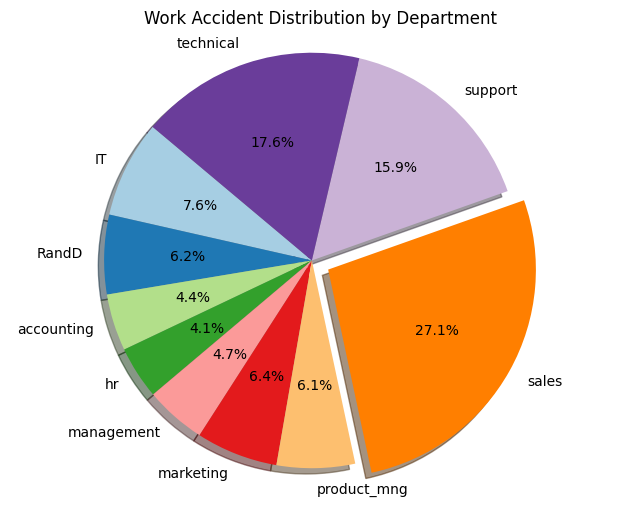

In [106]:
plt.figure(figsize=(8,6))
pie_labels=accident_counts.index
pie_data = accident_counts.values
# define how much to explode different pie wedges
explode = [0,0,0,0,0,0,0,0.09,0,0] # tukyaune
plt.pie(x=pie_data,labels=pie_labels,autopct='%1.1f%%',startangle=140,explode=explode,shadow=True,colors=plt.cm.Paired.colors)
plt.title('Work Accident Distribution by Department')
plt.axis('equal')
plt.show()
       

* This shows that Sales department has highest number of work accident 2.1%

# what is the distribution of promotions based on department?

In [117]:
# count and unstack to get pivot table
promotion_by_department = df.groupby(['sales','promotion_last_5years']).promotion_last_5years.count().unstack()
promotion_by_department

promotion_last_5years,0,1
sales,,
IT,1224.0,3.0
RandD,760.0,27.0
accounting,753.0,14.0
hr,724.0,15.0
management,561.0,69.0
marketing,815.0,43.0
product_mng,902.0,NaN
sales,4040.0,100.0
support,2209.0,20.0


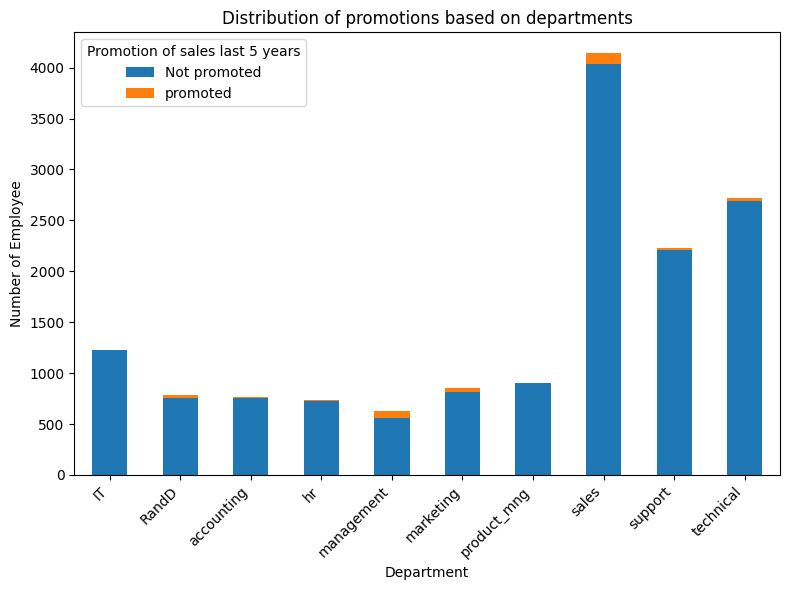

In [129]:
ax = promotion_by_department.plot(kind='bar',stacked=True,figsize=(8,6))
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.xticks(rotation = 45,ha='right')
plt.title('Distribution of promotions based on departments')
plt.legend(title='Promotion of sales last 5 years', labels=['Not promoted','promoted'])
plt.tight_layout()
plt.show()

* This shows the total number of employees are in sales department.
* Largest promoted employee count are from sales department followed by management department.
* IT and Product_management department employees doesnot got promotions.